### 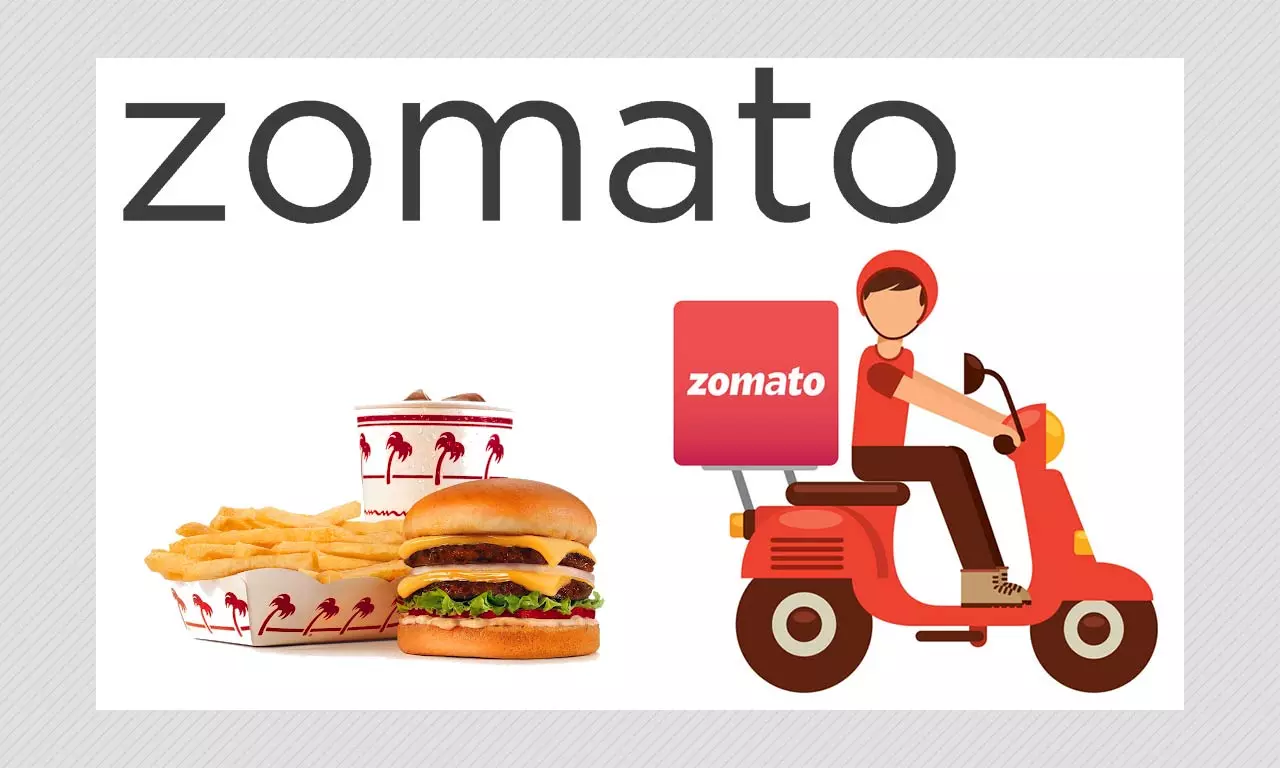


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("zomato.csv",encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

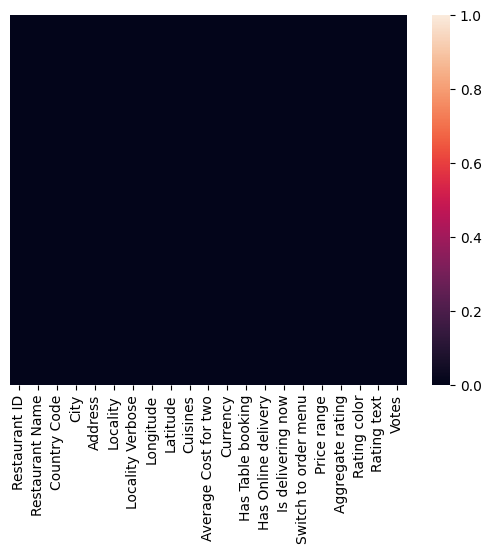

In [8]:
sns.heatmap(df.isnull(),yticklabels=False)

In [9]:
df_country=pd.read_excel('country-code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [11]:
final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [12]:
country_names=final_df['Country'].value_counts().index

In [13]:
country_val=final_df['Country'].value_counts().values

## Top 3 Countries that uses zomato

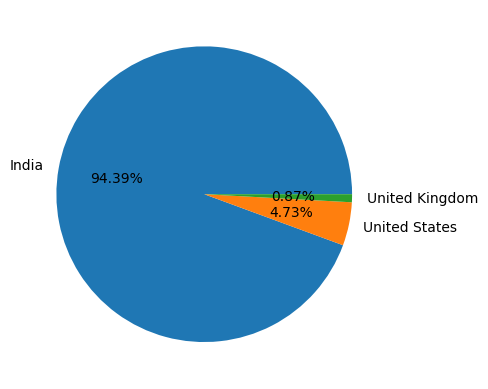

In [14]:
plt.pie(country_val[:3], labels=country_names[:3], autopct="%1.2f%%")
plt.show()

##  Zomato maximum records and transactions are from india and then USA and after that UK

In [15]:
ratings=final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [16]:
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

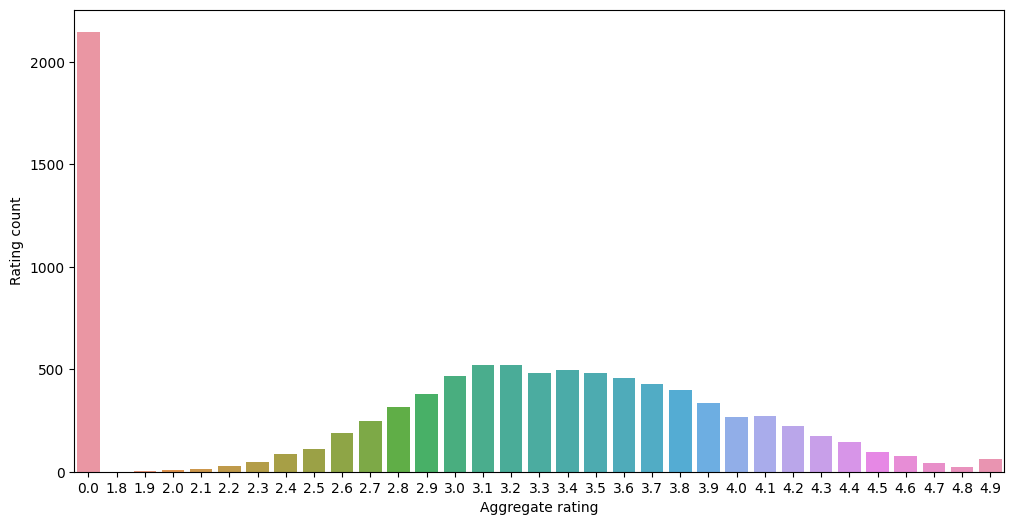

In [17]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x="Aggregate rating",y="Rating count",data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

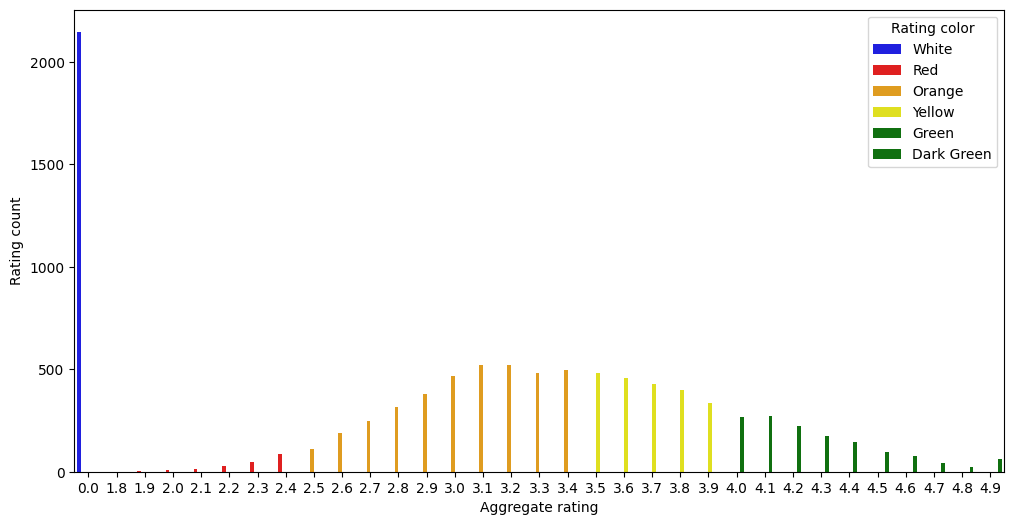

In [18]:
sns.barplot(x="Aggregate rating",y="Rating count", hue="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

 ## (i) Not Rated count is very high 
 ## (ii) Maximum no. of rating are between 2.5 to 3.6
                         

<Axes: xlabel='Rating color', ylabel='count'>

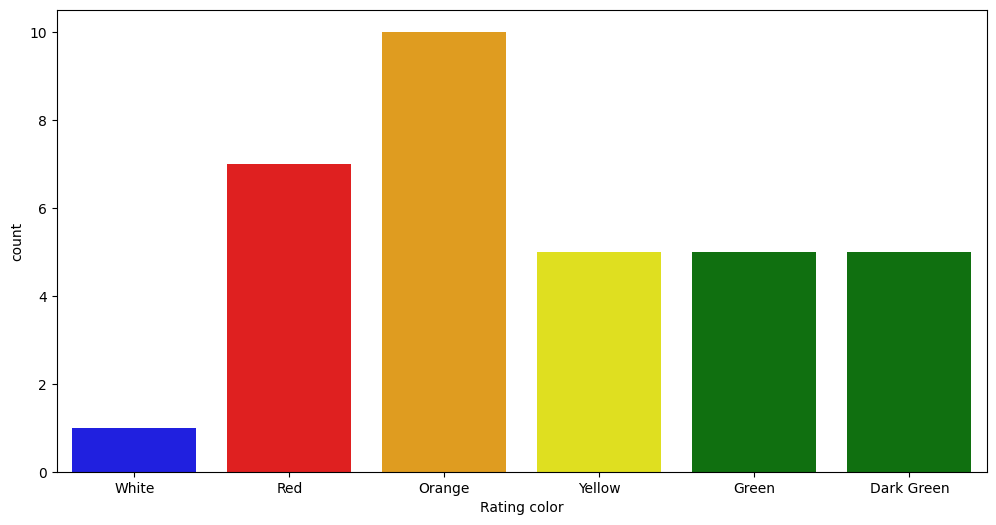

In [19]:
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [20]:
### The countries that have given maximum 0 rating
final_df[final_df['Rating color']== 'White'].groupby('Country').size().reset_index().rename(columns={0:'white ratings count'})

,Country,white ratings count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


### maxmum no. of 0 ratings are from indian customers

In [21]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [22]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [23]:
final_df[['Country','Has Online delivery']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


#### Only India and UAE have Online delivery options

In [24]:
final_df['City'].value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

In [25]:
city_values=final_df['City'].value_counts().values
city_labels=final_df['City'].value_counts().index

([<matplotlib.patches.Wedge at 0x2669507c050>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31')])

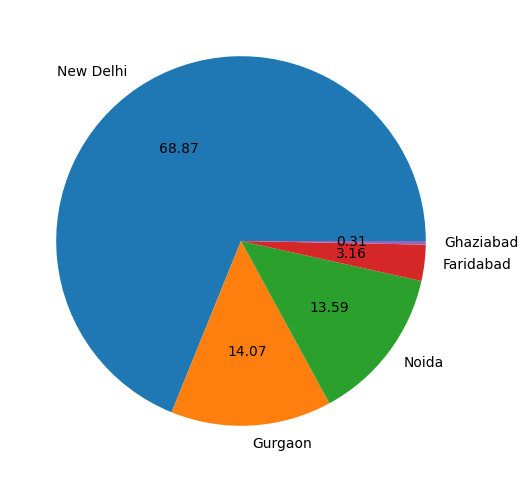

In [30]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f')

### So These are the top 5 Cities according to no. of Customer  transactions

In [64]:
### So we will find out the top 10 cuisines 

In [44]:
final_df['Cuisines'].value_counts().index

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       ...
       'Cafe, Pizza, Burger',
       'Healthy Food, Continental, Juices, Beverages, Italian, Salad, Lebanese',
       'Goan, American, Portuguese', 'South Indian, Desserts, Beverages',
       'Healthy Food, North Indian, Italian, Salad', 'Bengali, Fast Food',
       'North Indian, Rajasthani, Asian',
       'Chinese, Thai, Malaysian, Indonesian',
       'Bakery, Desserts, North Indian, Bengali, South Indian',
       'Italian, World Cuisine'],
      dtype='object', name='Cuisines', length=1825)

In [34]:
cuisine_values=final_df['Cuisines'].value_counts().values
cuisine_labels=final_df['Cuisines'].value_counts().index

## These are the top 10 Cuisines according to the Customer's preference

([<matplotlib.patches.Wedge at 0x266968009d0>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05'),
  Text(-0.32377027935326874, -0.5051463215816842

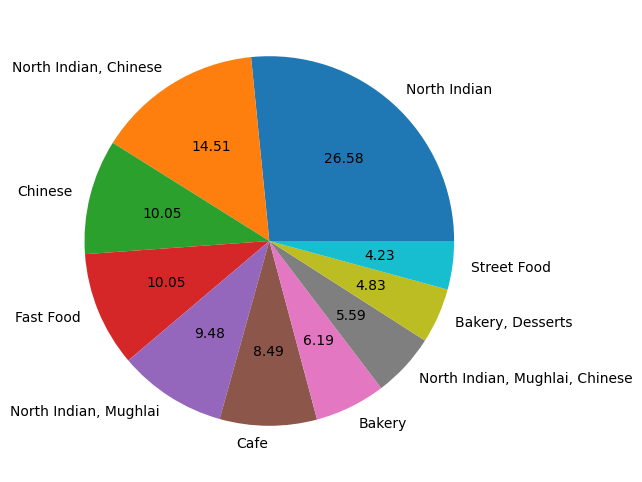

In [36]:
plt.pie(cuisine_values[:10],labels=cuisine_labels[:10],autopct='%1.2f')

In [52]:
cuisines_data=final_df['Cuisines'].value_counts().groupby(['Cuisines']).size().reset_index().rename(columns={'count':'No. of times'})

In [53]:
cuisines_data

,Cuisines,No. of times
0,Afghani,1
1,"Afghani, Mughlai, Chinese",1
2,"Afghani, North Indian",1
3,"Afghani, North Indian, Pakistani, Arabian",1
4,African,1
...,...,...
1820,"Western, Asian, Cafe",1
1821,"Western, Fusion, Fast Food",1
1822,World Cuisine,1
1823,"World Cuisine, Mexican, Italian",1


NameError: name 'Cuisines' is not defined

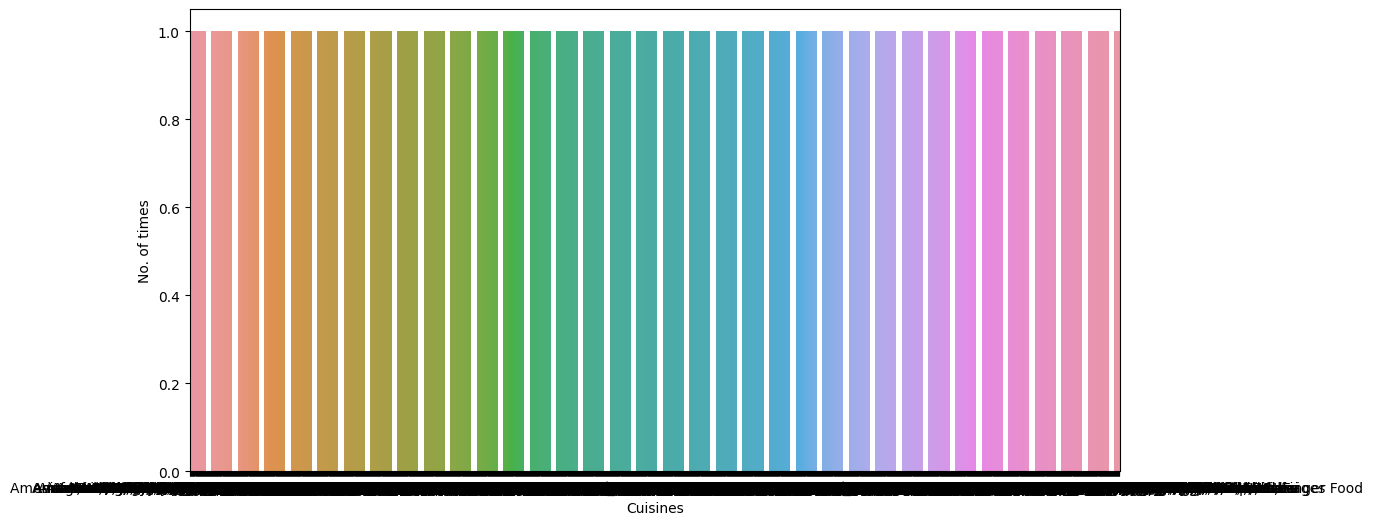

In [77]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x="Cuisines"[:10],y="No. of times",data=cuisines_data)
Cuisines.set_xlim(1,10)

#### Now we will find out the top 20 Restaurants according to the customers 

In [71]:
final_df['Restaurant Name'].value_counts().index

Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation',
       ...
       'The Town House Cafe', 'The G.T. Road', 'The Darzi Bar & Kitchen',
       'Smoke On Water', 'Piali - The Curry Bistro', 'Odeon Social',
       'Johnny Rockets', 'House of Commons', 'HotMess',
       'Walter's Coffee Roastery'],
      dtype='object', name='Restaurant Name', length=7446)

In [72]:
Restaurants_data=final_df['Restaurant Name'].value_counts().groupby(['Restaurant Name']).size().reset_index().rename(columns={'count':'No. of times'})

In [74]:
Restaurants_data.head(20)

,Restaurant Name,No. of times
0,Let's Burrrp,1
1,#45,1
2,#Dilliwaala6,1
3,#InstaFreeze,1
4,#OFF Campus,1
5,#Urban Cafí©,1
6,#hashtag,1
7,'Ohana,1
8,10 Downing Street,1
9,10 To 10 In Delhi,1


In [75]:
Restaurant_labels=final_df['Restaurant Name'].value_counts().index
Restaurant_values=final_df['Restaurant Name'].value_counts().values

### So these are the top 10 Restaurants according to the Customer's Orders details

([<matplotlib.patches.Wedge at 0x266c0fc7910>,
 [Text(0.9356929726956177, 0.5783413013507147, 'Cafe Coffee Day'),
  Text(-0.06965532582434786, 1.097792391841146, "Domino's Pizza"),
  Text(-0.9318145862585043, 0.58456956543759, 'Subway'),
  Text(-1.0780510707087592, -0.2186455783767375, 'Green Chick Chop'),
  Text(-0.7173175433025138, -0.8339397712487674, "McDonald's"),
  Text(-0.17895883291080544, -1.0853449848427008, 'Keventers'),
  Text(0.2864722779334164, -1.062042199715077, 'Pizza Hut'),
  Text(0.671818274330748, -0.8710110253465545, 'Giani'),
  Text(0.9470775450481013, -0.5595034617101683, 'Baskin Robbins'),
  Text(1.083500194570113, -0.18980866251709191, 'Barbeque Nation')],
 [Text(0.5103779851067005, 0.31545889164584434, '17.62'),
  Text(-0.03799381408600792, 0.5987958500951704, '16.77'),
  Text(-0.5082625015955478, 0.31885612660232177, '13.38'),
  Text(-0.5880278567502323, -0.11926122456912953, '10.83'),
  Text(-0.39126411452864385, -0.45487623886296397, '10.19'),
  Text(-0.097

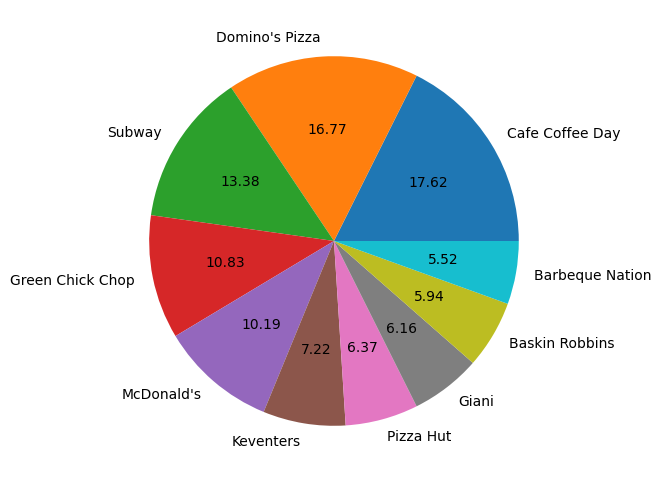

In [80]:
plt.pie(Restaurant_values[:10],labels=Restaurant_labels[:10],autopct='%1.2f')